In [1]:
from sklearn import model_selection
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import os
import torch
import numpy as np
import pandas as pd
from MicroBiome import MicroBiomeDataSet, Trainer, TrainTester, MultiTrainTester
from SNN import FeedForward, SiameseDataSet, SiameseModel, seed_everything
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

# Ignore warning messages
if True:
    import warnings
    warnings.filterwarnings('ignore')

# Load Data

In [2]:
from sklearn.datasets import make_circles

np.random.seed(42)

X, y = make_circles(n_samples=4000, factor=.3, noise=0.05)
OneHot = OneHotEncoder(sparse=False)
y = OneHot.fit_transform(y.reshape((y.shape[0], 1)))

In [3]:
y

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [4]:
y.shape

(4000, 2)

In [5]:
np.sum(y, axis=0)

array([2000., 2000.])

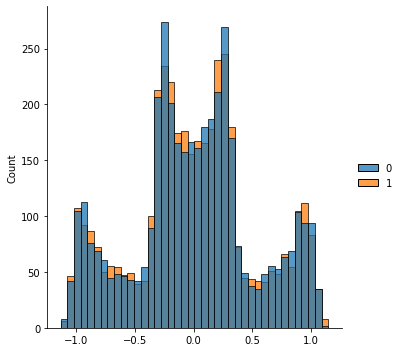

In [6]:
sns.displot(X)

In [7]:
# Test Effect of making X non-negative
# X = X + 2

# Define and Train Model

In [8]:
seed_everything(69)

In [9]:
MyFeedForward = FeedForward(2, [6, 6, 3, 3, 2], activation='softplus')

In [10]:
MyFeedForward

FeedForward(
  (layers): ModuleList(
    (0): Linear(in_features=2, out_features=6, bias=True)
    (1): Linear(in_features=6, out_features=6, bias=True)
    (2): Linear(in_features=6, out_features=3, bias=True)
    (3): Linear(in_features=3, out_features=3, bias=True)
    (4): Linear(in_features=3, out_features=2, bias=True)
  )
)

In [11]:
MySNN = SiameseModel(MyFeedForward, predict_unknown = False, class_min_train=5, 
                     n_example_predict=10, learning_rate=1.0e-3, num_epochs = 50, batch_size = 1000, rand_seed=142)

In [12]:
# list(MySNN.logistic.parameters()) + list(MySNN.model.parameters())

In [13]:
MyTrainer = Trainer(model = MySNN, scale_X = False, use_pca = False, n_components = 2)

In [14]:
MyTrainTester = TrainTester(MyTrainer, metrics.accuracy_score)

In [15]:
n_splits = 5
MyMultiTrainTester = MultiTrainTester(MyTrainTester, n_splits=n_splits)

In [16]:
MyMultiTrainTester.train(X, y)

Running for split 1 of 5
Training Encoder
#########################################
Epoch 1 of 50
__Training__
2021-03-09 02:27:43
MEAN LOSS: 0.7185609405517578
__Validation__
2021-03-09 02:27:44
MEAN LOSS: 0.7144800181006871
#########################################
Epoch 2 of 50
__Training__
2021-03-09 02:27:44
MEAN LOSS: 0.714252197265625
__Validation__
2021-03-09 02:27:44
MEAN LOSS: 0.7106691114973314
#########################################
Epoch 3 of 50
__Training__
2021-03-09 02:27:44
MEAN LOSS: 0.710526025390625
__Validation__
2021-03-09 02:27:45
MEAN LOSS: 0.7073715512115176
#########################################
Epoch 4 of 50
__Training__
2021-03-09 02:27:45
MEAN LOSS: 0.7073035186767578
__Validation__
2021-03-09 02:27:45
MEAN LOSS: 0.7045420621774091
#########################################
Epoch 5 of 50
__Training__
2021-03-09 02:27:45
MEAN LOSS: 0.7045266204833984
__Validation__
2021-03-09 02:27:45
MEAN LOSS: 0.7021162992764121
########################################

MEAN LOSS: 0.1462720413208008
__Validation__
2021-03-09 02:28:04
MEAN LOSS: 0.1412327557829025
#########################################
Epoch 46 of 50
__Training__
2021-03-09 02:28:04
MEAN LOSS: 0.13305425338745117
__Validation__
2021-03-09 02:28:04
MEAN LOSS: 0.12891210080480706
#########################################
Epoch 47 of 50
__Training__
2021-03-09 02:28:04
MEAN LOSS: 0.12195518531799317
__Validation__
2021-03-09 02:28:05
MEAN LOSS: 0.11836935999584455
#########################################
Epoch 48 of 50
__Training__
2021-03-09 02:28:05
MEAN LOSS: 0.11199542427062989
__Validation__
2021-03-09 02:28:05
MEAN LOSS: 0.10881861902163116
#########################################
Epoch 49 of 50
__Training__
2021-03-09 02:28:05
MEAN LOSS: 0.10277129211425781
__Validation__
2021-03-09 02:28:05
MEAN LOSS: 0.09999277010144252
#########################################
Epoch 50 of 50
__Training__
2021-03-09 02:28:06
MEAN LOSS: 0.09451175575256347
__Validation__
2021-03-09 02:28:06
M

MEAN LOSS: 0.44324988861083986
__Validation__
2021-03-09 02:28:26
MEAN LOSS: 0.4248378969977076
#########################################
Epoch 40 of 50
__Training__
2021-03-09 02:28:26
MEAN LOSS: 0.40711820373535157
__Validation__
2021-03-09 02:28:27
MEAN LOSS: 0.3730329381357325
#########################################
Epoch 41 of 50
__Training__
2021-03-09 02:28:27
MEAN LOSS: 0.3526382049560547
__Validation__
2021-03-09 02:28:27
MEAN LOSS: 0.285558549484404
#########################################
Epoch 42 of 50
__Training__
2021-03-09 02:28:27
MEAN LOSS: 0.24176418228149413
__Validation__
2021-03-09 02:28:28
MEAN LOSS: 0.20908072099934602
#########################################
Epoch 43 of 50
__Training__
2021-03-09 02:28:28
MEAN LOSS: 0.19307629928588868
__Validation__
2021-03-09 02:28:28
MEAN LOSS: 0.18182658891652104
#########################################
Epoch 44 of 50
__Training__
2021-03-09 02:28:28
MEAN LOSS: 0.17274657287597656
__Validation__
2021-03-09 02:28:28
MEAN

MEAN LOSS: 0.541447802734375
__Validation__
2021-03-09 02:28:49
MEAN LOSS: 0.5596793009073857
#########################################
Epoch 34 of 50
__Training__
2021-03-09 02:28:49
MEAN LOSS: 0.5341071228027344
__Validation__
2021-03-09 02:28:49
MEAN LOSS: 0.5540227984437848
#########################################
Epoch 35 of 50
__Training__
2021-03-09 02:28:49
MEAN LOSS: 0.5264440963745117
__Validation__
2021-03-09 02:28:50
MEAN LOSS: 0.5476615795887451
#########################################
Epoch 36 of 50
__Training__
2021-03-09 02:28:50
MEAN LOSS: 0.5179163970947266
__Validation__
2021-03-09 02:28:50
MEAN LOSS: 0.5398443412609083
#########################################
Epoch 37 of 50
__Training__
2021-03-09 02:28:50
MEAN LOSS: 0.50806220703125
__Validation__
2021-03-09 02:28:50
MEAN LOSS: 0.5307710649299793
#########################################
Epoch 38 of 50
__Training__
2021-03-09 02:28:50
MEAN LOSS: 0.497572248840332
__Validation__
2021-03-09 02:28:51
MEAN LOSS: 0.5

MEAN LOSS: 0.5920571990966796
__Validation__
2021-03-09 02:29:11
MEAN LOSS: 0.5930044344156096
#########################################
Epoch 28 of 50
__Training__
2021-03-09 02:29:11
MEAN LOSS: 0.5863436553955078
__Validation__
2021-03-09 02:29:12
MEAN LOSS: 0.5878781062005126
#########################################
Epoch 29 of 50
__Training__
2021-03-09 02:29:12
MEAN LOSS: 0.5806521270751953
__Validation__
2021-03-09 02:29:12
MEAN LOSS: 0.5826194618973616
#########################################
Epoch 30 of 50
__Training__
2021-03-09 02:29:12
MEAN LOSS: 0.5749588531494141
__Validation__
2021-03-09 02:29:12
MEAN LOSS: 0.5771476306108394
#########################################
Epoch 31 of 50
__Training__
2021-03-09 02:29:12
MEAN LOSS: 0.5691807373046875
__Validation__
2021-03-09 02:29:13
MEAN LOSS: 0.5715726411203133
#########################################
Epoch 32 of 50
__Training__
2021-03-09 02:29:13
MEAN LOSS: 0.5632845245361328
__Validation__
2021-03-09 02:29:13
MEAN LOSS:

MEAN LOSS: 0.6271304077148437
__Validation__
2021-03-09 02:29:33
MEAN LOSS: 0.6198634191422072
#########################################
Epoch 22 of 50
__Training__
2021-03-09 02:29:34
MEAN LOSS: 0.6209487731933594
__Validation__
2021-03-09 02:29:34
MEAN LOSS: 0.6133392086767271
#########################################
Epoch 23 of 50
__Training__
2021-03-09 02:29:34
MEAN LOSS: 0.614811328125
__Validation__
2021-03-09 02:29:34
MEAN LOSS: 0.6068654717034203
#########################################
Epoch 24 of 50
__Training__
2021-03-09 02:29:34
MEAN LOSS: 0.6087738464355469
__Validation__
2021-03-09 02:29:35
MEAN LOSS: 0.6005873383969257
#########################################
Epoch 25 of 50
__Training__
2021-03-09 02:29:35
MEAN LOSS: 0.6028194763183594
__Validation__
2021-03-09 02:29:35
MEAN LOSS: 0.5942707902992448
#########################################
Epoch 26 of 50
__Training__
2021-03-09 02:29:35
MEAN LOSS: 0.596953482055664
__Validation__
2021-03-09 02:29:36
MEAN LOSS: 0.58

In [17]:
scores_df = pd.DataFrame({'score': MyMultiTrainTester.train_scores, 'stage' : np.repeat('train', n_splits)})
scores_df = scores_df.append(pd.DataFrame({'score': MyMultiTrainTester.test_scores, 'stage' : np.repeat('test', n_splits)}))
scores_df

,score,stage
0,1.000000,train
1,1.000000,train
2,1.000000,train
3,1.000000,train
4,0.968125,train
0,1.000000,test
1,1.000000,test
2,1.000000,test
3,1.000000,test
4,0.971250,test


<AxesSubplot:xlabel='stage', ylabel='score'>

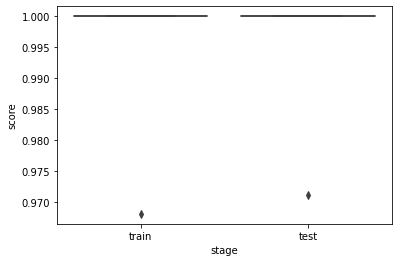

In [18]:
sns.boxplot(data = scores_df, x = 'stage', y = 'score')

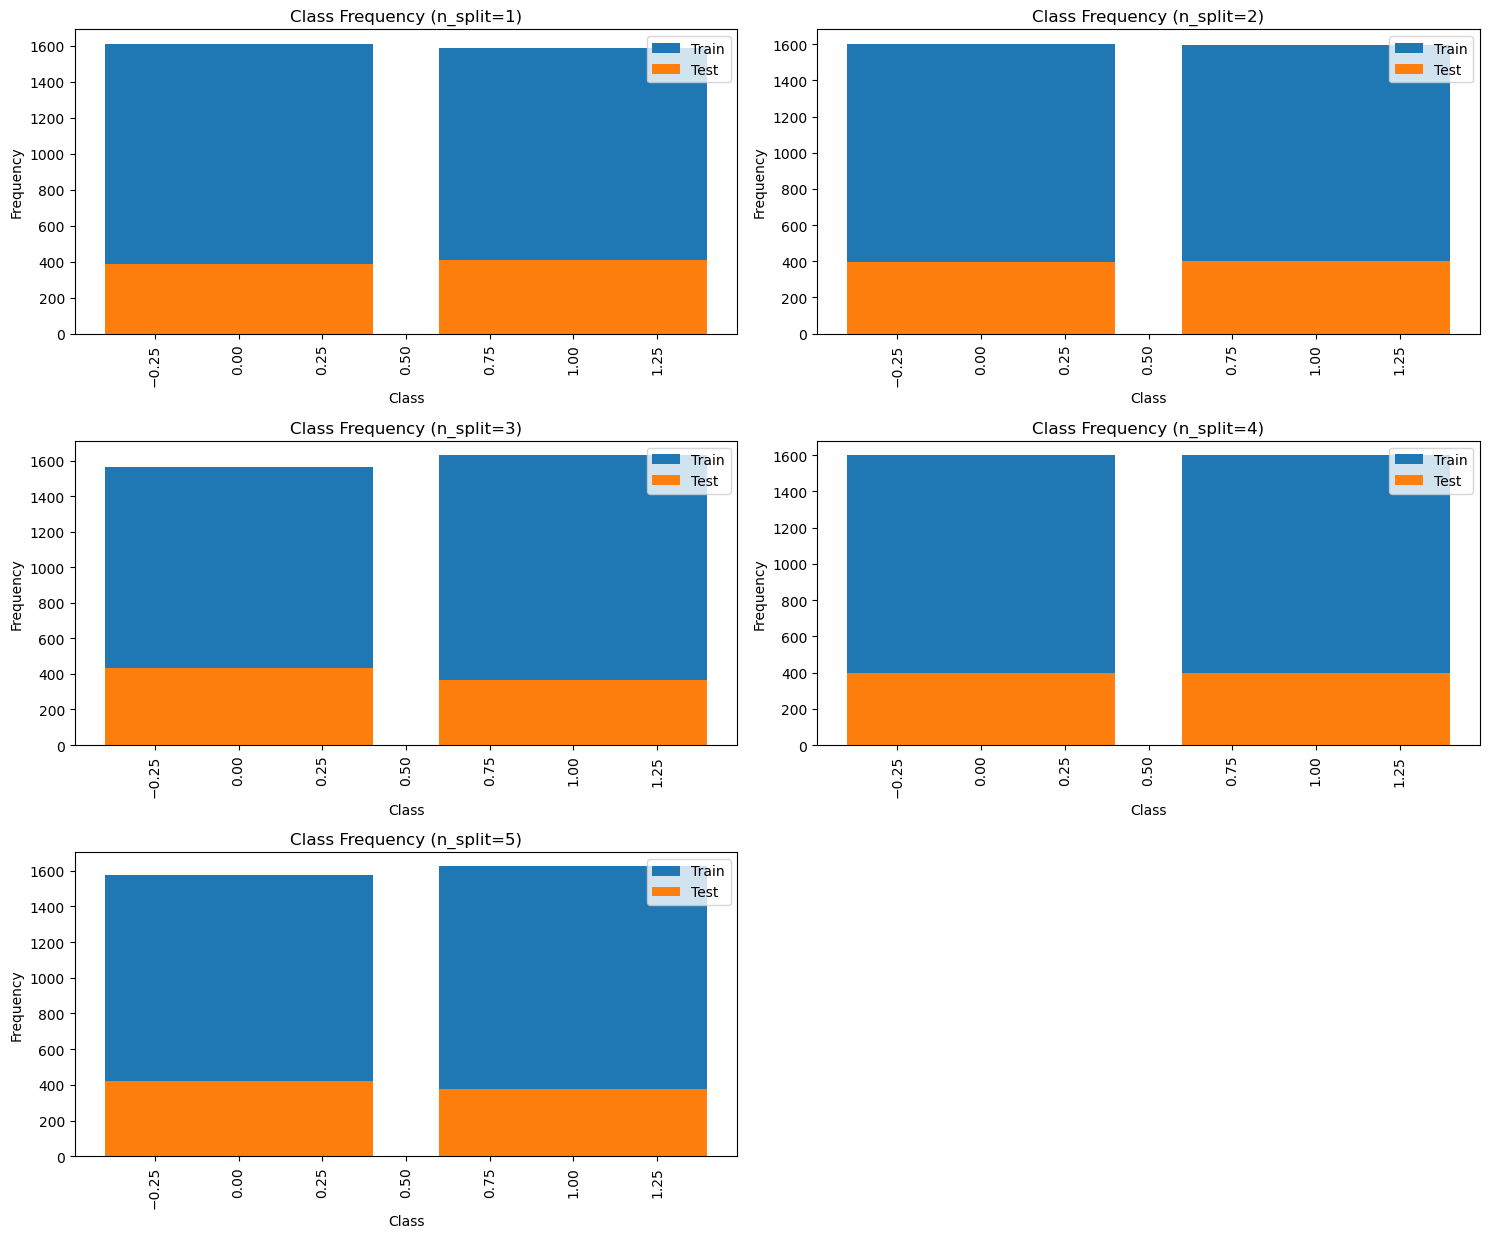

In [19]:
MyMultiTrainTester.plot_class_freq(normalize=True)

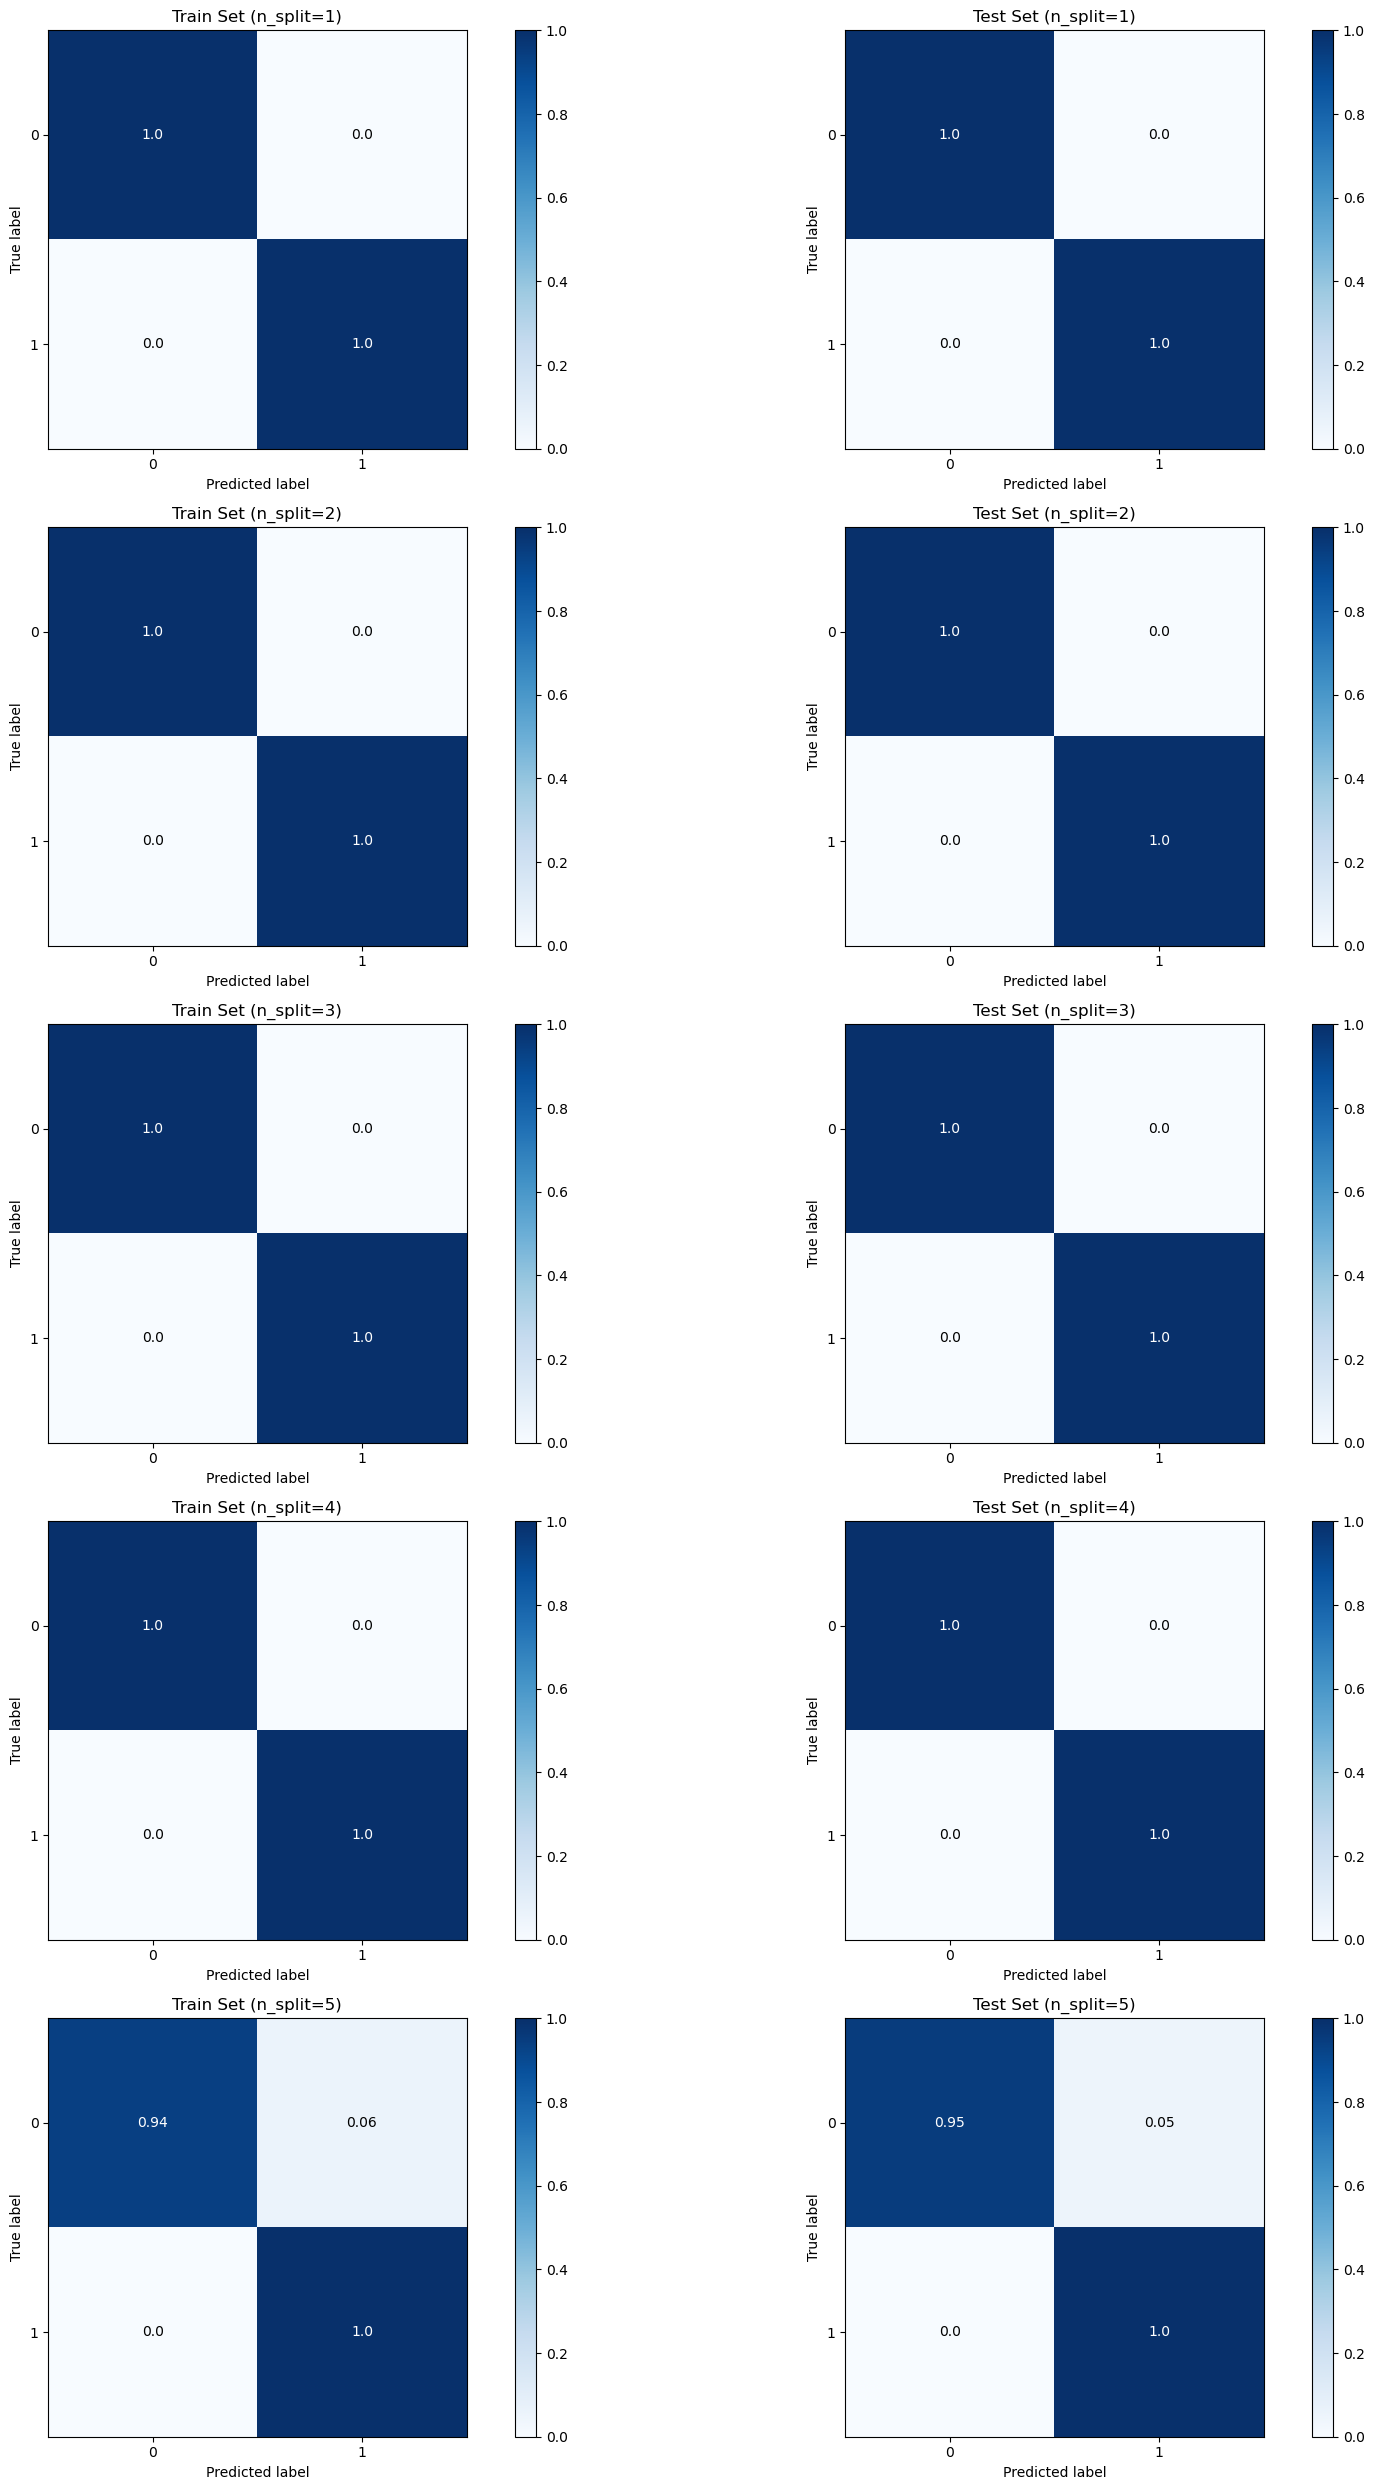

In [20]:
MyMultiTrainTester.plot_confusion(normalize=True)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


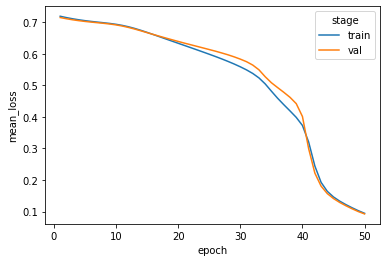

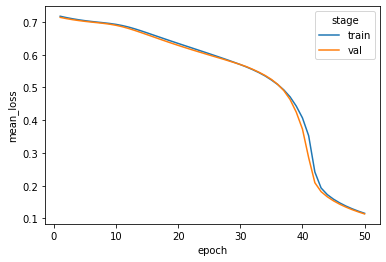

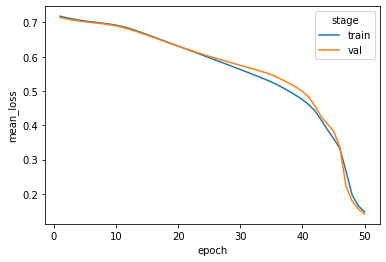

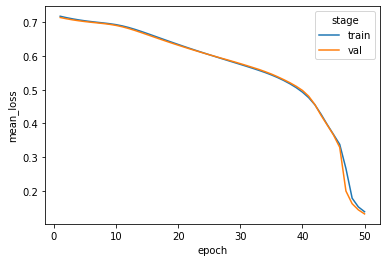

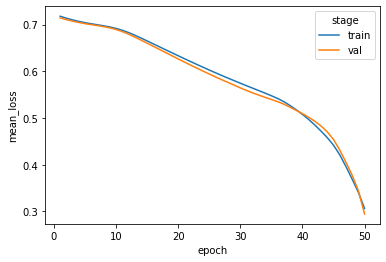

In [21]:
for i, trainer in enumerate(MyMultiTrainTester.TrainerList):
    plt.figure(i)
    print(sns.lineplot(data=trainer.model.TrainStats, x='epoch', y='mean_loss', hue = 'stage'))

### Examine Data In Encoded Space

In [22]:
Trainer_use = MyMultiTrainTester.TrainerList[0]

In [23]:
X_transform = Trainer_use.transform_X(X)

In [24]:
X_encoded = Trainer_use.model.model.forward(torch.from_numpy(X_transform).to(torch.float32)).detach().numpy()

In [25]:
# X_encoded = MyFeedForward.forward(torch.from_numpy(X_transform).to(torch.float32)).detach().numpy()

In [26]:
X_encoded.shape

(4000, 2)

In [27]:
y_label = Trainer_use.model.one_hot.inverse_transform(y).astype('str')

In [28]:
y_pred = Trainer_use.model.predict(X_transform)
y_pred = Trainer_use.model.one_hot.inverse_transform(y_pred).astype('str')

In [29]:
X_enc_df = pd.DataFrame(X_encoded, columns = ['X' + str(i+1) for i in range(X_encoded.shape[1])])
X_enc_df['y'] = y_label
X_enc_df['y_pred'] = y_pred

In [30]:
X_enc_df

,X1,X2,y,y_pred
0,0.000931,7.655628e-01,0,0
1,1.843154,5.541518e-01,1,1
2,0.012244,7.323959e-01,0,0
3,1.818395,1.017839e+00,1,1
4,1.834101,3.888868e-02,1,1
...,...,...,...,...
3995,0.003209,5.942779e-07,0,0
3996,0.002763,1.728281e-05,0,0
3997,0.000002,1.307403e-07,0,0
3998,1.838649,4.513493e-01,1,1


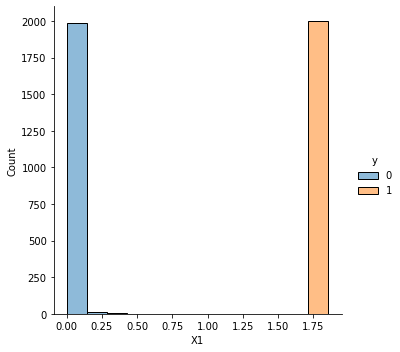

In [31]:
sns.displot(data=X_enc_df, x='X1', hue='y')

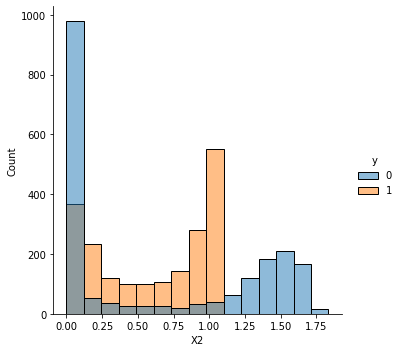

In [32]:
sns.displot(data=X_enc_df, x='X2', hue='y')

In [33]:
def do_plot(df, x, y, hue):
    if x in df.columns and y in df.columns and hue in df.columns:
        sns.scatterplot(data=df, x=x, y=y, hue = hue)

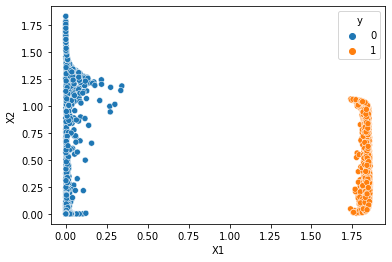

In [34]:
do_plot(X_enc_df, 'X1', 'X2', 'y')

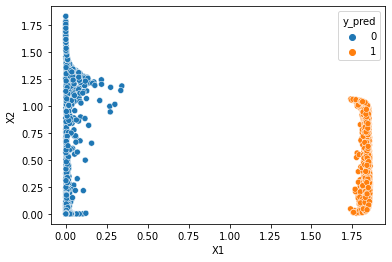

In [35]:
do_plot(X_enc_df, 'X1', 'X2', 'y_pred')

In [36]:
do_plot(X_enc_df, 'X2', 'X3', 'y')

In [37]:
do_plot(X_enc_df, 'X3', 'X4', 'y')

### Examine Misclassified Samples, or first sample if no misclassified samples

If no misclassified samples, show correcly classified sample

In [38]:
X_db = Trainer_use.model.ClassDB['X_encoded'].detach().numpy()
X_db.shape

(20, 2)

In [39]:
y_db = Trainer_use.model.ClassDB['y'].detach().numpy()
y_db = Trainer_use.model.one_hot.inverse_transform(y_db).astype('str').flatten()

In [40]:
db_df = pd.DataFrame(X_db, columns = ['X' + str(i+1) for i in range(X_encoded.shape[1])])
db_df['y'] = y_db

In [41]:
db_df['y'].value_counts()

0    10
1    10
Name: y, dtype: int64

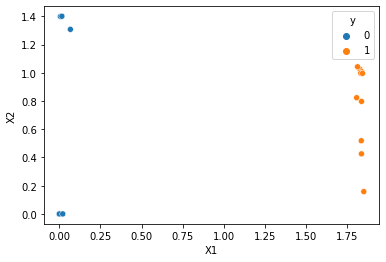

In [42]:
do_plot(db_df, 'X1', 'X2', 'y')

In [43]:
do_plot(db_df, 'X2', 'X3', 'y')

In [44]:
X_enc_df['misclassified'] = X_enc_df['y'] != X_enc_df['y_pred']

In [45]:
X_enc_df

,X1,X2,y,y_pred,misclassified
0,0.000931,7.655628e-01,0,0,False
1,1.843154,5.541518e-01,1,1,False
2,0.012244,7.323959e-01,0,0,False
3,1.818395,1.017839e+00,1,1,False
4,1.834101,3.888868e-02,1,1,False
...,...,...,...,...,...
3995,0.003209,5.942779e-07,0,0,False
3996,0.002763,1.728281e-05,0,0,False
3997,0.000002,1.307403e-07,0,0,False
3998,1.838649,4.513493e-01,1,1,False


In [46]:
misclassified_idx = np.argwhere(X_enc_df['misclassified'].to_numpy()).flatten()
misclassified_idx

array([], dtype=int64)

In [47]:
if len(misclassified_idx) == 0:
    X_diff = torch.abs(torch.from_numpy(X_encoded[0, :] - X_db).to(torch.float32))
else:
    X_diff = torch.abs(torch.from_numpy(X_encoded[misclassified_idx[0], :] - X_db).to(torch.float32))
logistic_output = Trainer_use.model.logistic.forward(X_diff)

In [48]:
logistic_output[y_db == '0', 1]

tensor([0.9162, 0.9161, 0.9161, 0.8985, 0.9127, 0.9163, 0.8961, 0.8644, 0.9162,
        0.9115], grad_fn=<IndexBackward>)

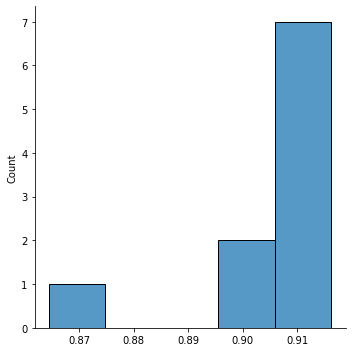

In [49]:
# distribution of 0 label probabilities
sns.displot(logistic_output[y_db == '0', 1].detach().numpy())

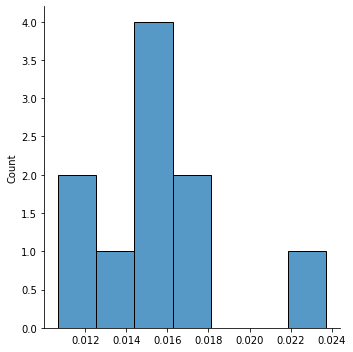

In [50]:
# distribution of 1 label probabilities
sns.displot(logistic_output[y_db == '1', 1].detach().numpy())

In [51]:
torch.median(logistic_output[y_db == '0',1])

tensor(0.9127, grad_fn=<MedianBackward0>)

In [52]:
torch.median(logistic_output[y_db == '1',1])

tensor(0.0145, grad_fn=<MedianBackward0>)

In [53]:
X_diff_df = pd.DataFrame(X_diff, columns = ['X' + str(i+1) + '_diff' for i in range(X_encoded.shape[1])])
X_diff_df['y'] = y_db

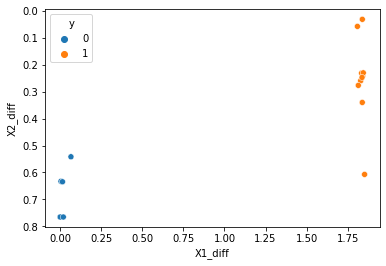

In [54]:
do_plot(X_diff_df, 'X1_diff', 'X2_diff', 'y')

In [55]:
do_plot(X_diff_df, 'X2_diff', 'X3_diff', 'y')

In [56]:
for p in Trainer_use.model.logistic.parameters():
    print(p)

Parameter containing:
tensor([[ 2.0983, -0.9511],
        [-1.0728,  0.5370]], requires_grad=True)
Parameter containing:
tensor([-0.2443,  1.0105], requires_grad=True)


### Examine Data In Original Space

In [57]:
X_df = pd.DataFrame(X, columns = ['X1', 'X2'])
X_df['y'] = y_label

<AxesSubplot:xlabel='X1', ylabel='X2'>

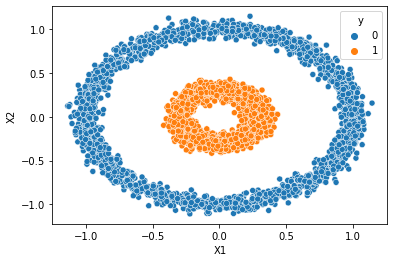

In [58]:
sns.scatterplot(data=X_df, x='X1', y='X2', hue = 'y')